<a href="https://colab.research.google.com/github/chaeyeonlee0417/VITAmin/blob/main/%EB%B9%84%ED%83%80%EB%AF%BC_13_14%EA%B8%B0_15%EC%A3%BC%EC%B0%A8_%EB%B3%B5%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EC%9D%B4%EC%B1%84%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6조**

## 1. 매개변수 갱신 방법
(총 25점)

#### 1.1 다음 중 각 옵티마이저에 관한 설명으로 옳지 않은 것은? (3점)

1. SGD(Stochastic Gradient Descent)는 모든 파라미터에 대해 동일한 학습률을 사용한다.
2. Momentum은 과거의 기울기를 고려하여 빠르게 수렴하도록 도와준다.
3. AdaGrad는 학습률을 점진적으로 증가시켜 적응형 학습을 수행한다.
4. Adam은 Momentum과 AdaGrad의 장점을 결합한 옵티마이저이다.
5. Adam의 학습률은 처음에는 크게 설정되지만, 시간이 지남에 따라 감소한다.

답 : 3. AdaGrad는 학습률을 점진적으로 증가시켜 적응형 학습을 수행한다.

#### 1.2 SGD는 매개변수의 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복함으로써 최적해를 구하는 방법입니다. 아래 그림을 참고해서 코드의 빈칸을 채워 SGD를 구현해주세요. (5점)

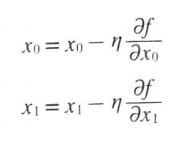

In [ ]:
# (문제 아님)수치미분을 이용해 기울기를 구하는 함수입니다. 실행해주세요.

def numerical_gradient(f, x) :
    h = 1e-4
    # x와 형상이 같은 배열 생성
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [ ]:
# '???'를 채워주세요!

def gradient_descent(f, init_x, lr=0.01, step_num=100):

    # 초깃값 설정
    x = init_x

    # step_num 만큼 반복하면서 기울기를 구하고 가중치 갱신
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

위에서 정의한 함수를 통해 f(x0, x1) = x0^2+x1^2 이 최소가 되는 (x0, x1)을 구해봅시다. f(x0, x1) = x0^2+x1^2은 3차원 공간 상에서 다음과 같이 생긴 함수입니다.

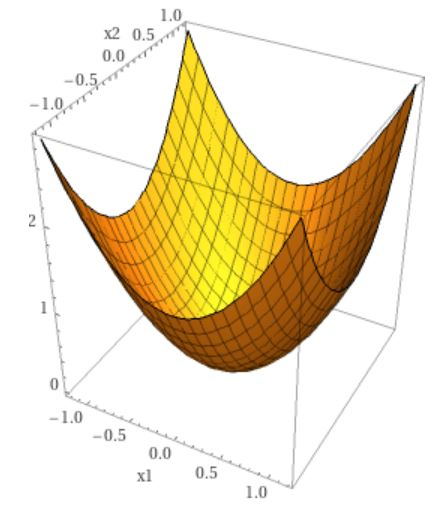

위 그림에서 알 수 예상할 수 있는 것처럼 최적해가 (0, 0)인지 확인해보세요.

In [ ]:
# '???'를 채워주세요.

import numpy as np

# 함수 지정
def function(x):
    return x[0]**2 + x[1]**2

# 초깃값 설정
init_x = np.array([-3.0, 4.0])

# 위에서 정의한 gradient_descent 함수를 이용해 함숫값이 최소가 되는 x를 구해주세요.
# learning_rate은 0.1, step_num은 100으로 설정해주세요.
result = gradient_descent(function, init_x, lr=0.1, step_num=100)
print(result)

[-6.11110793e-10  8.14814391e-10]


#### 1.3  아래는 SGD와 Momentum에 의한 최적화 갱신 경로를 각각 시각화한 그림입니다. 모멘텀에서 지그재그 움직임이 줄어드는 이유를 서술해주세요. (5점)

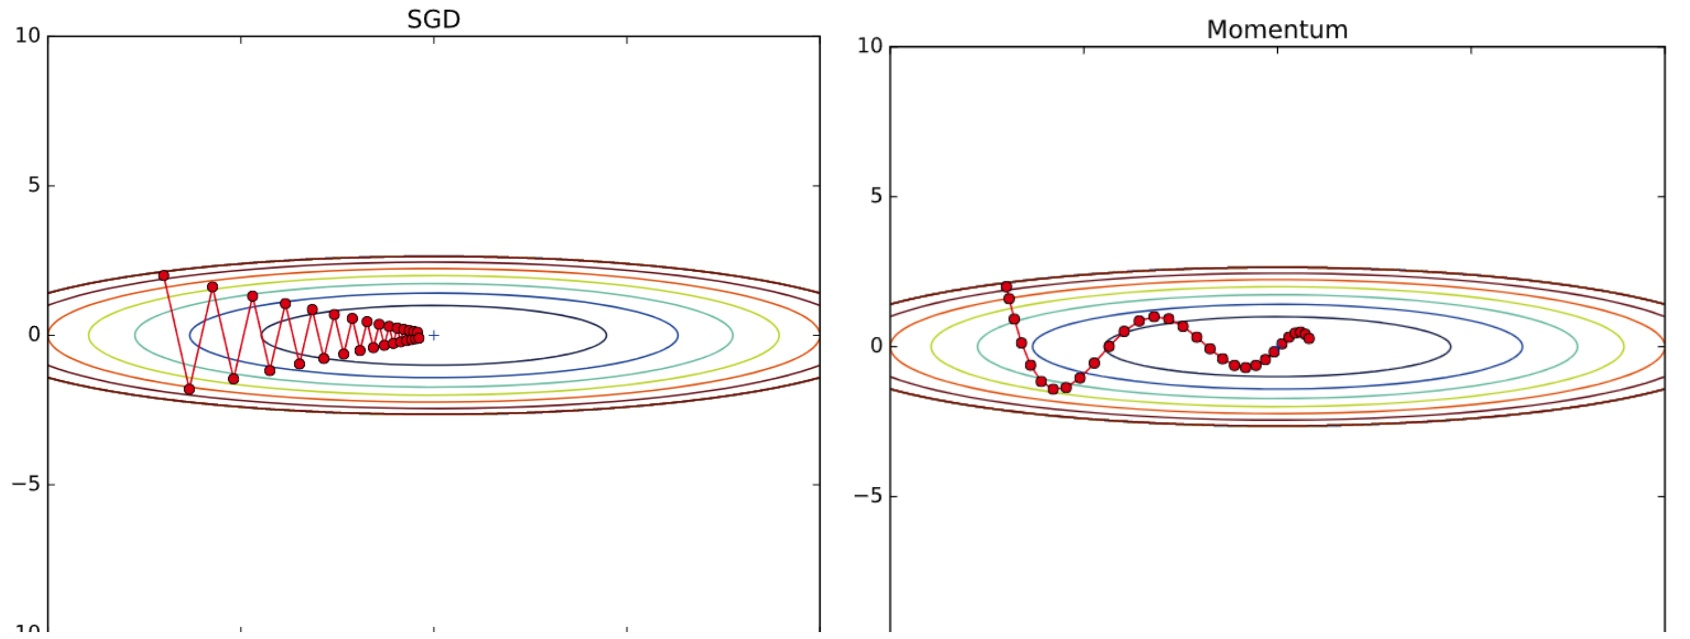

답 : 1. 관성 효과: Momentum 알고리즘은 기울기의 이동 평균을 사용합니다. 이는 과거의 기울기 값들을 누적하여 현재의 업데이트 방향을 결정합니다. 이로 인해 하나의 방향으로 지속적으로 이동하는 경향이 생기며, 일시적인 변동(즉, 지그재그 움직임)이 줄어듭니다.

2. 일관된 방향 유지: 스토캐스틱 그레디언트 디센트(SGD)에서는 기울기가 매번 미니 배치에 따라 계산되기 때문에 기울기의 방향이 자주 바뀌게 됩니다. 반면에 Momentum은 이전 단계의 기울기 정보(이전 업데이트 벡터)를 함께 사용하여, 일관된 방향으로 더 빠르게 이동할 수 있도록 돕습니다.

3. 감속과 가속의 균형: Momentum은 기울기를 단순히 더하는 것이 아니라, 이전 단계의 업데이트 벡터에 일정 비율을 곱하여 추가합니다. 이는 마치 공이 경사면을 내려가는 것과 같은 효과를 줍니다. 경사면을 내려갈 때, 공은 이전 움직임의 영향을 받아 더 빨리 내려가고, 이는 기울기 변화로 인한 지그재그 움직임을 완화합니다.


SGD에서는 기울기 방향이 자주 바뀌기 때문에 경로가 지그재그 형태를 띠며, 이는 최적화 과정에서 더 많은 반복을 필요로 하게 합니다. 반면에 Momentum을 사용하면 이러한 방향 전환이 줄어들고, 더 부드럽고 빠른 경로로 수렴하게 됩니다.

결론적으로, Momentum은 과거의 기울기를 누적하여 일관된 방향으로 이동하도록 하여 지그재그 움직임을 줄입니다. 이는 더 효율적인 최적화와 빠른 수렴을 가능하게 합니다.

#### 1.4 아래는 AdaGrad optimizer에서 가중치를 업데이트하는 방식을 구현한 코드입니다. 수식을 참고하여 다음 빈칸을 채우세요. (5점, 각 1점)

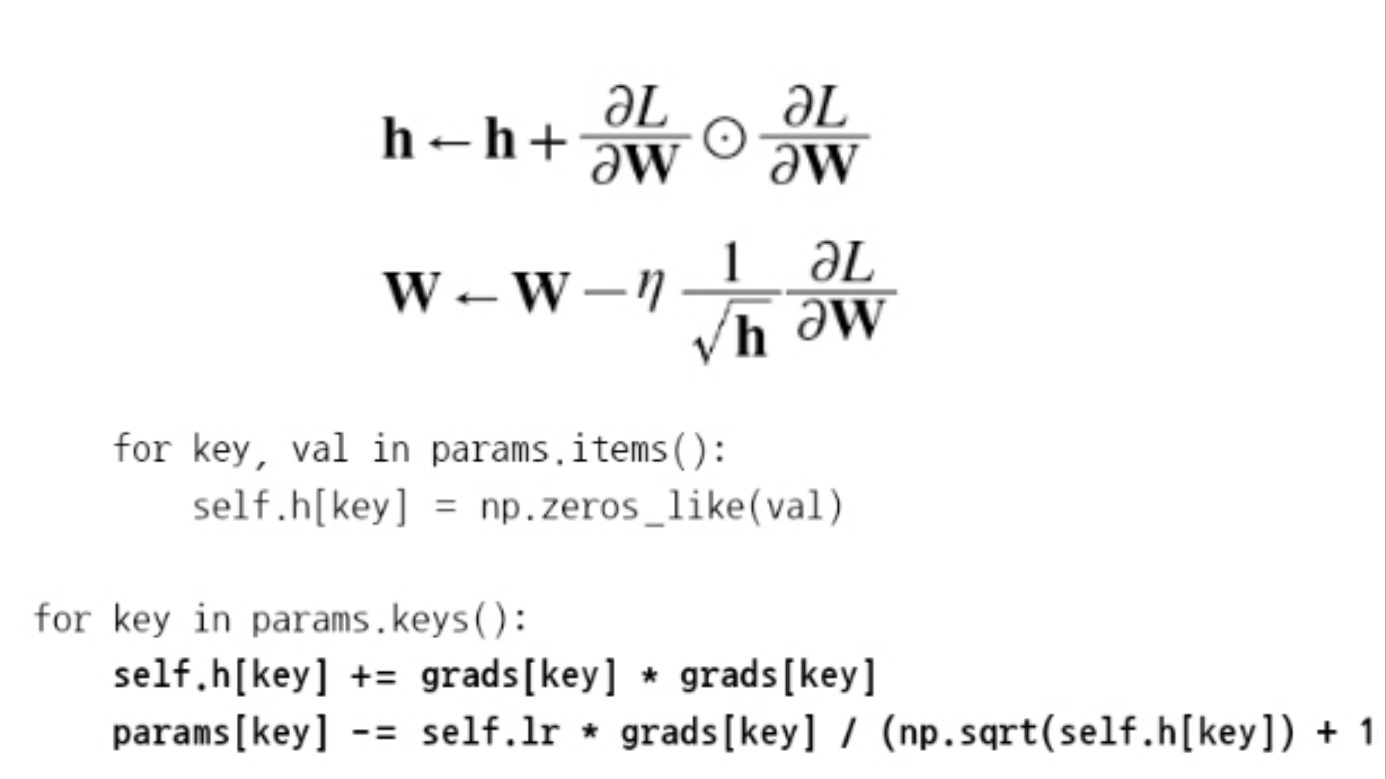

1. self.h[key] : AdaGrad 옵티마이저에서 각 파라미터의 기울기의 (ㅇㅇ)을 누적하여 저장하고 학습률을 조정함.
2. grads[key] : 현재 미니배치에 대한 각 파라미터의 (ㅇㅇㅇ)
3. params[key] : 현재 최적화 중인 모델 파라미터.
4. self.lr : (ㅇㅇㅇ)
5. 1e-7 : 분모에 더해져 분모가 (ㅇ)이 되는 것을 방지함.
6. self.h[key] += grads[key] * grads[key] : 각 파라미터의 기울기의 제곱을 누적하여 self.h[key]에 더함.
7. params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) : 학습률과 기울기를 사용하여 현재의 파라미터 값을 (ㅇㅇㅇㅇ)

#### 1.5 다음은 각 최적화 기법으로 f(x,y) = x^2 / 20 + y^2의 최적해를 찾는 과정을 나타낸 코드입니다. 코드의 빈 칸을 채우고 물음에 답하세요. (3점)

In [ ]:
#(문제 아님) 그대로 실행하세요.

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

# 함수와 그라디언트 정의
def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

# 최적화 기법 클래스 정의
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        for key in params.keys():
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * (grads[key] ** 2)

            m_hat = self.m[key] / (1 - self.beta1 ** self.iter)
            v_hat = self.v[key] / (1 - self.beta2 ** self.iter)

            params[key] -= self.lr * m_hat / (np.sqrt(v_hat) + 1e-7)

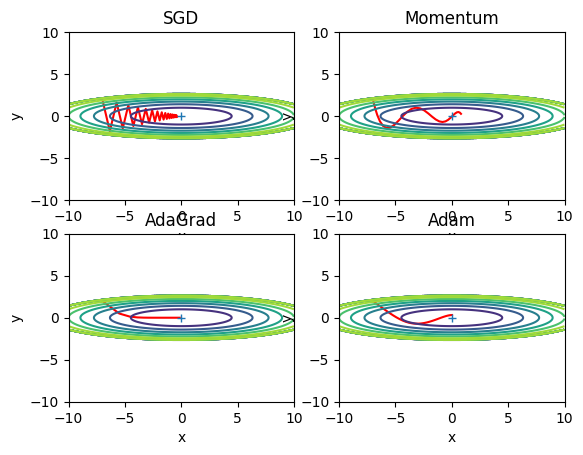

In [ ]:
# 초기화 및 최적화 설정
init_pos = (-7.0, 2.0)
params = {'x': init_pos[0], 'y': init_pos[1]}
grads = {'x': 0, 'y': 0}

# 학습률 = {SGD : 0.95, Momentum : 0.1, AdaGrad : 1.5, Adam : 0.3}
optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0

    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, '-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()

#### 1.5.1 위 그림으로부터 주어진 공간에서 가장 효율적으로 최적해에 접근한 옵티마이저 순으로 나열하세요. (2점)

답 :  Adam - Momentum - AdaGrad - SGD

#### 1.5.2. 항상 1.5.1에서 응답한 순으로 옵티마이저의 성능이 구분된다. (O / X) (2점)

답 : X

## 2. 가중치 초기값 (25점)

#### 2.1. 가중치 초기값을 제대로 설정하는 것이 중요한 이유는 무엇인가요? 제대로 설정했을 때 얻는 효과 세가지를 활용해 설명해주세요. (5점)

답:

1. **수렴 속도 향상**: 적절한 초기화는 학습의 수렴 속도를 빠르게 할 수 있습니다.
-  효과: 잘 초기화된 가중치는 학습 초기에 기울기 소실(vanishing gradient)이나 폭발(exploding gradient)을 피할 수 있게 하여, 신경망이 더 빠르게 최적해로 수렴하도록 도와줍니다. 이를 통해 학습 시간이 단축되고, 보다 효율적으로 학습할 수 있습니다.
-  예시: Xavier 초기화, He 초기화 등은 층별로 입력과 출력의 분포를 균형 있게 유지시켜 기울기가 적절한 크기를 가지도록 도와줍니다.


2. **안정적인 학습**: 적절한 초기화는 신경망의 각 층에서 적절한 신호 크기를 유지하게 하여, 안정적인 학습을 가능하게 합니다.
-  효과: 가중치가 너무 크거나 작으면, 신경망의 출력을 불안정하게 만들고 학습이 불가능해질 수 있습니다. 적절한 초기화는 이런 문제를 방지하여 학습을 안정적으로 진행하게 합니다.
-  예시: 너무 큰 초기 가중치는 폭발하는 기울기 문제를 야기할 수 있으며, 너무 작은 초기 가중치는 기울기 소실 문제를 일으킬 수 있습니다. Xavier 초기화는 활성화 함수로 sigmoid나 tanh를 사용할 때 효과적이며, He 초기화는 ReLU 계열의 활성화 함수에 적합합니다.


3. **균등한 기울기 분포**: 적절한 초기화는 모든 층에서 균등한 기울기 분포를 유지하게 하여, 역전파 과정에서 정보가 고르게 전달되도록 합니다.
- 효과: 균등한 기울기 분포는 각 층이 고유의 기울기를 유지하여, 특정 층의 기울기가 지나치게 작거나 커지지 않게 합니다. 이는 학습이 특정 층에서 정체되지 않도록 하며, 전체 네트워크의 학습을 촉진합니다.
- 예시: 적절한 초기화 없이 깊은 신경망을 학습하면, 초기 층의 기울기가 매우 작아져 학습이 정체될 수 있습니다. 적절한 초기화는 이러한 문제를 방지하여 각 층이 고르게 학습하도록 돕습니다.

#### 2.2. 설명했던 다른 두 초기값과 달리, 자비에 초기값은 분산을 계산할 때 어떤 값을 추가로 활용할까요? (3점)

답 : Xavier Normal Initialization: 가중치를 평균이 0이고, 분산이 $2/
(n
in
​
 +n
out)$  정규 분포로 초기화합니다.
Xavier Uniform Initialization: 가중치를 범위가
$\text{균등분포}: \left[ - \sqrt{\frac{6}{n_{\text{입력}} + n_{\text{출력}}}}, \sqrt{\frac{6}{n_{\text{입력}} + n_{\text{출력}}}} \right]
$인 균등 분포로 초기화합니다.

#### 2.3. 자비에 초기값이 따르는 정규 분포와 균등 분포에 대한 수식을 글로 설명해주세요. (5점)

ex) 자비에 초기값은 평균 = ?, 표준편차 = ? 인 정규 분포를 따르고, 하한 = ?, 상한 = ?인 균등 분포를 따른다.

답 : Xavier 초기화에서 가중치는 평균이 0이고, 표준편차가 $\sqrt{\frac{2}{n_{\text{입력}} + n_{\text{출력}}}}$인 정규 분포를 따릅니다. 그리고 Xavier 초기화에서 가중치는 범위가 $[- \sqrt{\frac{6}{n_{\text{입력}} + n_{\text{출력}}}}, \sqrt{\frac{6}{n_{\text{입력}} + n_{\text{출력}}}}]$인 균등 분포를 따릅니다.



#### 2.4. ReLU 활성화 함수와 사용하기에 적합한 초기값 중 자비에 초기값을 개선하여 만든 초기값은? (3점)

답 :He 초기화

#### 2.5. 4번 답을 초기값으로 이용해 나타낸 활성화 값 분포를 나타내주세요. (6점)

In [ ]:
# 실행해주세요! - 문제 X
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def ReLU(x):
    return np.maximum(0, x)
def tanh(x):
    return np.tanh(x)

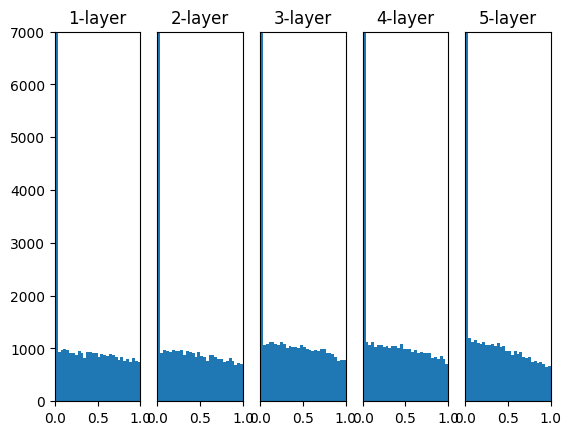

In [ ]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터, 표준정규분포로 1000행 100열 행렬생성
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # ? 초깃값
    w = np.random.randn(x.shape[1], node_num) * np.sqrt(2.0 / x.shape[1])

    a = np.dot(x, w)

    # 활성화 함수 - ReLU
    z = ReLU(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0.0, 1.0)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#### 2.6. 나타난 활성화 값 분포에 대해 간단하게 설명해주세요. (3점)

답 : **활성화 값 분포 설명**
1.  초기층의 분포: 첫 번째 은닉층: 입력 데이터에 대해 He 초기화로 가중치를 설정하고 ReLU 활성화 함수를 적용한 후, 첫 번째 히스토그램이 생성됩니다. ReLU 함수는 음수를 0으로 변환하기 때문에, 이 층에서는 대부분의 값이 0 이상의 양수로 나타납니다. 결과적으로, 히스토그램은 0 근처에 많은 값이 밀집되어 있고, 양수 쪽으로 퍼지는 형태를 가집니다.
중간층의 분포:

2.  중간 은닉층들: 각 은닉층을 통과하면서 활성화 값의 분포는 점진적으로 변할 수 있습니다. ReLU 함수의 특성상, 각 층에서 0 이상의 값만 유지되므로, 히스토그램의 0 근처 빈도는 여전히 높고, 분포의 폭은 다소 넓어질 수 있습니다. 데이터가 여러 층을 거치면서 분포의 형태가 변할 수 있지만, 대부분의 값은 여전히 0 근처에 집중되는 경향이 있습니다.
최종층의 분포:

3.  마지막 은닉층: 마지막 은닉층에서는 활성화 값이 더 넓은 범위로 퍼질 수 있으며, 여전히 0 이상의 값이 대부분을 차지합니다. 하지만, 이전 층에서의 분포가 다음 층으로 전달되면서, 값이 0으로 치우치는 비율이 점차 줄어들고, 더 넓은 범위로 분포할 수 있습니다.


**결론**
ReLU 활성화 함수는 음수를 0으로 변환하기 때문에, 각 층의 활성화 값 분포는 0 근처에 높은 빈도를 보이며, 양수 방향으로 분포가 퍼지는 경향을 나타냅니다. He 초기화는 이러한 활성화 값을 효과적으로 유지하도록 가중치를 초기화하여, 네트워크의 학습이 더 안정적이고 효율적으로 이루어지도록 도와줍니다.








# **1조**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 정규화 (25점)

#### 1.(3점)
 세션 발표 내용을 참고해서 공변량 변화 (Covariate Shift)에 대해 서술하시오.


(답 서술) 공변량 변화(Covariate Shift)는 모델 학습과 평가 과정에서 입력 데이터의 분포가 변경되는 현상을 말합니다. 이는 훈련 데이터와 테스트 데이터가 서로 다른 분포를 가질 때 발생합니다. 예를 들어, 모델이 훈련 데이터에서 잘 작동하더라도, 새로운 데이터가 들어올 때 입력 특성의 분포가 변하면 성능이 저하될 수 있습니다. 공변량 변화는 모델이 새로운 데이터에 적응하지 못하게 하며, 이는 데이터 수집 과정이나 데이터의 시간적 변동 등 여러 요인으로 인해 발생할 수 있습니다. 이러한 변화는 모델의 일반화 능력에 부정적인 영향을 미치므로, 데이터 분포의 변화를 모니터링하고 이를 반영하는 방법을 개발하는 것이 중요합니다. 대응 방법으로는 데이터의 분포를 정기적으로 업데이트하거나, 분포 변화에 강인한 모델을 사용하는 것이 있습니다.

#### 2.(2점)

1번 문제를 바탕으로, Internal Covariate Shift 에 대해 서술하시오.

(답 서술) Internal Covariate Shift는 신경망의 각 레이어에서 발생하는 공변량 변화로, 네트워크의 훈련 중에 각 층의 입력 분포가 지속적으로 변하는 현상을 말합니다. 이는 네트워크의 파라미터 업데이트로 인해 각 층의 입력 데이터 분포가 변화하면서 발생합니다.

**Internal Covariate Shift의 문제점**:
-  훈련 안정성 저하: 각 층의 입력 분포가 계속 바뀌면, 이전 층에서 학습한 파라미터가 다음 층의 학습에 방해가 될 수 있습니다.
-  학습 속도 저하: 내부의 입력 분포가 변화하면, 학습률을 조정하거나 반복적으로 파라미터를 업데이트해야 하므로 훈련 속도가 느려질 수 있습니다.


**해결 방법**:
-  배치 정규화 (Batch Normalization): Internal Covariate Shift를 완화하기 위해 배치 정규화가 도입되었습니다. 배치 정규화는 각 레이어의 출력을 정규화하여, 평균이 0이고 분산이 1이 되도록 조정합니다. 이로 인해 각 레이어의 입력 분포가 일정하게 유지되며, 학습이 더 안정적이고 빠르게 진행됩니다.

#### 3.(2점)

세션 발표 내용을 참고하여 화이트닝(Whitening)에 대해 적으시오.

(답 서술) 화이트닝(Whitening)은 데이터의 통계적 특성을 조정하여 각 특성이 독립적이고 동일한 분산을 가지도록 변환하는 기법입니다. 주로 데이터 전처리 과정에서 사용되며, 입력 데이터의 상관관계를 제거하고 분산을 통일하여 모델의 학습을 용이하게 만듭니다. 이 과정은 공분산 행렬을 사용하여 데이터를 변환하고, 결과적으로 데이터의 공분산 행렬이 단위 행렬이 되도록 합니다. 화이트닝은 주성분 분석(PCA)과 같은 방법을 통해 수행될 수 있으며, PCA로 차원 축소 후 특성의 스케일을 조정하여 화이트닝을 진행합니다. 이 기법은 데이터의 스케일 차이를 줄이고, 신경망 훈련의 수렴 속도를 개선하는 데 도움을 줍니다. 그러나 화이트닝 과정에서 정보 손실이 발생할 수 있어, 실제 적용 시 신중한 사용이 필요합니다.

#### 4.(3점)
세션 발표 내용을 참고하여 화이트닝의 문제에 대해 적으시오. 또한 이와 연관하여 배치 정규화가 등장하게 된 배경에 대해 적으시오.

(답 서술)

### 화이트닝의 문제

화이트닝(Whitening)은 데이터의 분산을 통일하고 상관관계를 제거하여 신경망 훈련을 개선하려는 기법입니다. 그러나 몇 가지 문제점이 존재합니다:

1. **정보 손실**: 화이트닝 과정에서 데이터의 주성분을 변환하면서 일부 정보가 손실될 수 있습니다. 이로 인해 데이터의 원래 구조가 왜곡될 수 있습니다.

2. **계산 비용**: 화이트닝을 수행하려면 공분산 행렬의 고유값 분해를 계산해야 하며, 이는 높은 계산 비용과 메모리 소모를 초래할 수 있습니다. 특히 대규모 데이터셋에서는 계산이 비효율적일 수 있습니다.

3. **훈련 시간 증가**: 화이트닝을 적용하면 각 배치마다 화이트닝 파라미터를 재계산해야 하므로, 훈련 시간이 길어질 수 있습니다. 이로 인해 신경망의 훈련 속도가 느려질 수 있습니다.

4. **일반화 성능 저하**: 화이트닝은 과도한 변환으로 인해 데이터의 분산을 너무 균등하게 만들 수 있으며, 이로 인해 모델이 새로운 데이터에 잘 일반화되지 않을 수 있습니다.

### 배치 정규화(Batch Normalization)의 등장 배경

배치 정규화는 내부 공변량 변화(Internal Covariate Shift)를 해결하기 위해 등장했습니다. 네트워크의 각 레이어에서 입력 데이터의 분포가 훈련 과정 중에 계속 변화하는 문제를 해결하기 위해 다음과 같은 문제를 해결하고자 했습니다:

1. **훈련 안정성**: 내부 공변량 변화로 인해 네트워크의 각 레이어 입력 분포가 변동하여 훈련이 불안정해지는 문제를 해결하고자 했습니다. 배치 정규화는 각 레이어의 입력을 정규화하여 이러한 문제를 완화합니다.

2. **훈련 속도 개선**: 데이터의 분포를 정규화함으로써 더 높은 학습률을 사용할 수 있게 되어 훈련 속도를 개선할 수 있습니다. 이는 데이터의 스케일과 분포가 일정하게 유지되기 때문입니다.

3. **화이트닝의 복잡성 제거**: 배치 정규화는 화이트닝과 달리 계산 비용이 적고, 온라인 학습에서 실시간으로 적용할 수 있어 훈련 과정에서의 계산 부담을 줄입니다.

4. **과적합 방지**: 배치 정규화는 각 배치에 대해 정규화된 입력을 사용하므로 모델의 과적합을 줄이는 데 도움을 줍니다.

이와 같이, 배치 정규화는 화이트닝의 복잡성을 피하면서도 신경망의 학습을 안정화하고 속도를 개선하는 데 효과적입니다.

#### 5.(5점)

In [ ]:
# 실행해주세요
import torch
import torch.nn as nn
import torch.nn.functional as F

다음은 1D 데이터에 대한 배치 정규화 코드입니다. 빈 코드를 알맞게 채워주세요.

In [ ]:
## 문제
class BatchNormalization1D(nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super(BatchNormalization1D, self).__init__()

        # Initialize scale and shift parameters
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))

        # Initialize moving averages
        self.running_mean = torch.zeros(num_features)
        self.running_var = torch.ones(num_features)

        self.eps = eps
        self.momentum = momentum

    def forward(self, x):
        # Check if we are in training or evaluation mode
        if self.training:
            # Compute the mean and variance of the input
            mean = x.mean(dim=0)
            var = x.var(dim=0, unbiased=False)

            # Update running mean and variance
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var

            # Normalize the input
            x_normalized = (x - mean) / torch.sqrt(var + self.eps)
        else:
            # Normalize using running mean and variance during evaluation
            x_normalized = (x - self.running_mean) / torch.sqrt(self.running_var + self.eps)

        # Scale and shift
        out = self.gamma * x_normalized + self.beta
        return out

#### 6.(10점)

다음 코드는 MNIST 데이터를 CNN을 활용하여 분류하는 것입니다. 코드를 알맞게 완성하여 배치 정규화를 사용하였을 때와 사용하지 않았을 때의 성능 격차를 확인해보세요.

In [ ]:
### 실행해주세요
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [ ]:
## 그냥 실행해주세요
## 배치정규화를 사용하지 않은 모델입니다.

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras import optimizers

def deep_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model
model_usual = deep_cnn()
model_usual.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 50)          │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 28, 28, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 28, 28, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 7, 7, 50)            │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 7, 7, 50)            │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 450)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,310 (532.46 KB)

 Trainable params: 136,310 (532.46 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import optimizers

def deep_cnn_advanced():
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Batch normalization after convolution
    model.add(Activation('relu'))

    # Second convolutional layer
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Batch normalization after convolution
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    # Third convolutional layer
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Batch normalization after convolution
    model.add(Activation('relu'))

    # Fourth convolutional layer
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Batch normalization after convolution
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    # Fifth convolutional layer
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Batch normalization after convolution
    model.add(Activation('relu'))

    # Sixth convolutional layer
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())  # Batch normalization after convolution
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2,2)))

    # Flatten the layer to connect to dense layers
    model.add(Flatten())

    # Dense layer with 50 neurons
    model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))

    # Final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))

    # Corrected learning rate parameter
    adam = optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

model = deep_cnn_advanced()
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 50)          │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 28, 28, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 28, 28, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 14, 14, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 7, 7, 50)            │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 50)            │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 7, 7, 50)            │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 50)            │             2

 Total params: 137,510 (537.15 KB)

 Trainable params: 136,910 (534.80 KB)

 Non-trainable params: 600 (2.34 KB)

모델이 어떻게 다른지에 대해 적어주세요.

(답 서술)

# 1. 배치 정규화 (Batch Normalization)

-  deep_cnn 모델: 배치 정규화를 사용하지 않습니다. Convolutional layer 후에 활성화 함수(ReLU)만 적용됩니다.
-  deep_cnn_advanced 모델: 모든 Convolutional layer 후에 배치 정규화를 적용합니다. 배치 정규화 레이어가 Convolutional layer와 활성화 함수 사이에 삽입되어 있습니다.

## 배치 정규화의 역할:

-  Internal Covariate Shift 감소: 배치 정규화는 각 레이어의 입력 분포를 정규화하여 학습을 안정화하고 가속화합니다. 이는 네트워크의 훈련이 더 빠르고 안정적이게 만드는 데 도움을 줍니다.
-  학습 속도 향상: 학습률을 더 높일 수 있게 되어, 훈련이 더 빨라질 수 있습니다.
-  정규화 효과: 배치 정규화는 약간의 정규화 효과를 제공하여 드롭아웃과 같은 다른 정규화 기법이 필요할 수도 있습니다.


#2. 모델 구조
##deep_cnn 모델:
- Convolutional layers: 총 6개의 Convolutional 레이어가 있으며, MaxPooling 레이어가 3개 있습니다.
- 배치 정규화가 없음.

##deep_cnn_advanced 모델:
- Convolutional layers: 총 6개의 Convolutional 레이어가 있으며, MaxPooling 레이어가 3개 있습니다.
- 각 Convolutional 레이어 후에 배치 정규화가 추가되어 있어, 활성화 함수(ReLU) 전에 데이터가 정규화됩니다.


#3. 활성화 함수와 정규화:
- deep_cnn 모델: 각 Convolutional 레이어 후에 ReLU 활성화 함수만 적용됩니다.
- deep_cnn_advanced 모델: 각 Convolutional 레이어 후에 배치 정규화가 먼저 적용된 후 ReLU 활성화 함수가 적용됩니다.

## 2.드롭아웃, 가중치 감소 (25점)

#### 1.(10점)

세션 발표를 참고하여 드롭아웃의 개념과 원리에 대해 자세히 적어주세요. (순전파, 역전파 시 어떻게 작동되는지 포함)

(답 서술)
# 드롭아웃 (Dropout) 개념과 원리

## 개념
드롭아웃(Dropout)은 신경망의 과적합(overfitting)을 방지하기 위한 강력한 정규화 기법입니다. 훈련 과정에서 네트워크의 일부 뉴런을 임의로 비활성화하여, 모델이 특정 뉴런에 과도하게 의존하는 것을 방지합니다. 이로 인해 더 일반화된 모델을 학습할 수 있습니다.

## 순전파와 역전파 시 드롭아웃의 작동 원리

### 순전파 (Forward Pass)
1. **드롭아웃 적용**:
   - 훈련 과정에서, 각 뉴런에 대해 드롭아웃 비율(p)을 사용하여 뉴런을 비활성화할 확률을 결정합니다. 예를 들어, p=0.5로 설정된 경우, 각 뉴런이 비활성화될 확률은 50%입니다.
   - 각 뉴런의 출력값을 0으로 설정하여 드롭아웃이 적용됩니다. 비활성화된 뉴런의 출력은 무시됩니다.
   
2. **스케일링**:
   - 드롭아웃이 적용된 경우, 남아있는 뉴런들만 활성화되기 때문에 출력의 분포가 변합니다. 이를 보정하기 위해, 활성화된 뉴런의 출력을 \( \frac{1}{1-p} \)로 스케일링합니다. 이는 훈련 과정에서 뉴런의 활성화를 원래 크기로 유지하기 위한 조정입니다.
   - 예를 들어, p=0.5인 경우, 활성화된 뉴런의 출력을 2배로 증가시킵니다.

### 역전파 (Backward Pass)
1. **역전파 중의 드롭아웃**:
   - 역전파 단계에서도 드롭아웃이 적용됩니다. 즉, 순전파에서 비활성화된 뉴런들은 역전파에서의 기울기 계산에서도 무시됩니다.
   - 기울기는 비활성화된 뉴런이 아닌 활성화된 뉴런들에 대해서만 계산됩니다. 이로 인해, 네트워크가 학습 중에 다양한 뉴런 조합을 고려하게 됩니다.

2. **가중치 업데이트**:
   - 드롭아웃이 적용된 뉴런들은 기울기 계산에서 제외되기 때문에, 업데이트된 가중치는 드롭아웃된 뉴런의 기여를 포함하지 않습니다.
   - 모든 뉴런이 활성화된 상태에서 훈련된 가중치는 드롭아웃의 영향을 보상하기 위해 테스트 중에는 모든 뉴런이 활성화된 상태에서 스케일링된 값을 사용합니다.

## 드롭아웃의 이점
1. **과적합 방지**: 특정 뉴런의 활성화에 의존하지 않고, 여러 뉴런이 협력하여 모델을 학습하므로, 과적합을 줄이고 더 일반화된 모델을 학습할 수 있습니다.
2. **학습 안정성 향상**: 다양한 뉴런 조합으로 훈련하기 때문에, 모델의 성능이 훈련 데이터에 의존하지 않고 테스트 데이터에 대해서도 잘 일반화됩니다.
3. **신경망의 복잡성 감소**: 네트워크의 복잡성을 인위적으로 줄여줌으로써, 학습과정에서 보다 견고한 특징을 학습할 수 있습니다.



#### 2.(5점)

L2정규화와 비교하여 L1정규화의 특징에 대해 서술하시오.

(답 서술)
# L1 정규화와 L2 정규화 비교

## L1 정규화 (L1 Regularization)

### 정의
L1 정규화는 가중치 벡터의 L1 노름(norm), 즉 모든 가중치의 절대값의 합을 정규화 항으로 추가합니다. 수식으로 표현하면 다음과 같습니다:
\[
\text{L1 Regularization Term} = \lambda \sum_{i} |w_i|
\]
여기서 \( \lambda \)는 정규화 강도를 조절하는 하이퍼파라미터입니다.

### 특징
- **희소성 (Sparsity)**: L1 정규화는 가중치 벡터의 절대값이 작은 가중치들을 0으로 만드는 경향이 있습니다. 이는 모델이 자동으로 중요하지 않은 특성을 제거하고, 보다 간결하고 해석 가능한 모델을 생성하는 데 도움을 줍니다.
- **특징 선택 (Feature Selection)**: L1 정규화는 많은 가중치를 0으로 만들어 특정 특성을 선택하거나 무시하는 데 유용합니다. 이는 데이터 차원이 매우 클 때 유리합니다.
- **비선형 최적화**: L1 정규화의 최적화는 L2 정규화보다 더 복잡할 수 있으며, 비선형 최적화 문제를 생성할 수 있습니다.

### 장점
- **희소성**: L1 정규화는 모델의 가중치 중 일부를 0으로 만들어, 모델의 복잡성을 줄이고 해석 가능성을 높입니다.
- **특징 중요도**: 중요하지 않은 특성을 제거함으로써, 모델의 성능을 향상시키는 데 도움이 될 수 있습니다.

### 단점
- **최적화 문제**: L1 정규화는 최적화 문제에서 비선형성을 유발할 수 있으며, 최적화가 어려울 수 있습니다.

## L2 정규화 (L2 Regularization)

### 정의
L2 정규화는 가중치 벡터의 L2 노름(norm), 즉 가중치 제곱합의 제곱근을 정규화 항으로 추가합니다. 수식으로 표현하면 다음과 같습니다:
\[
\text{L2 Regularization Term} = \lambda \sum_{i} w_i^2
\]
여기서 \( \lambda \)는 정규화 강도를 조절하는 하이퍼파라미터입니다.

### 특징
- **가중치 축소 (Weight Shrinkage)**: L2 정규화는 모든 가중치를 조금씩 줄이는 경향이 있습니다. 가중치의 크기가 균일하게 줄어들기 때문에 모델이 더 일반화된 성능을 보일 수 있습니다.
- **수학적 간결성**: L2 정규화는 수학적으로 다루기 쉬우며, 최적화 문제가 일반적으로 연속적이고 미분 가능하여 효율적인 해결이 가능합니다.

### 장점
- **수학적 안정성**: L2 정규화는 수학적으로 연속적이고 매끄럽기 때문에, 최적화가 쉽고 안정적입니다.
- **과적합 방지**: 가중치의 크기를 줄여 과적합을 방지하고 모델을 일반화하는 데 도움을 줍니다.

### 단점
- **특징 선택 부족**: L2 정규화는 가중치를 0으로 만드는 대신, 모든 가중치를 균일하게 감소시키기 때문에, 특성 선택(feature selection) 기능이 부족합니다.

## 요약

- **L1 정규화**는 가중치의 일부를 0으로 만들어 희소한 모델을 생성하고, 중요하지 않은 특성을 제거하는 데 유리합니다. 하지만, 최적화가 어려울 수 있습니다.
- **L2 정규화**는 가중치의 크기를 균일하게 줄이며 수학적으로 안정적이고 최적화가 쉽습니다. 그러나, 특성 선택에는 적합하지 않습니다.

두 정규화 기법은 각각의 장점과 단점이 있으며, 문제의 특성이나 데이터의 성격에 따라 적절한 방법을 선택하여 사용하는 것이 중요합니다.


#### 3.(10점)

주어진 코드를 모두 완성하여 random search와 grid search로 탐색한 최적 하이퍼 파라미터를 적으세요. 코드를 사용하여도 좋습니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# 경로에 맞게 불러와주세요
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VITAmin/2024 여름 방학 세션/15주차/credit_card.zip.zip', na_values = '#NAME?')

X = df[['V17', 'V9', 'V6', 'V12']]
Y = df['Class']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30,random_state = 101)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 하이퍼파라미터 후보군 정의
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 7, 10],
    'n_estimators': [20, 50, 100, 200]
}

# RandomizedSearchCV 사용
clf = RandomForestClassifier()
random_search_cv = RandomizedSearchCV(
    estimator=clf,
    param_distributions=random_search,
    n_iter=10,  # 랜덤 검색 시도 횟수
    cv=4,       # 교차 검증 폴드 수
    verbose=1,
    random_state=101,
    n_jobs=-1
)
random_search_cv.fit(X_Train, Y_Train)
print("RandomizedSearchCV 최적 하이퍼파라미터:")
print(random_search_cv.best_params_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
8 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:


RandomizedSearchCV 최적 하이퍼파라미터:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy'}


In [ ]:
# GridSearchCV 사용 (수정된 부분: random_search_params -> random_search)
grid_search_cv = GridSearchCV(
    estimator=clf,
    param_grid=random_search,  # 수정된 부분: random_search_params를 random_search로 변경
    cv=4,       # 교차 검증 폴드 수
    verbose=1,
    n_jobs=-1
)
grid_search_cv.fit(X_Train, Y_Train)
print("GridSearchCV 최적 하이퍼파라미터:")
print(grid_search_cv.best_params_)

Fitting 4 folds for each of 2400 candidates, totalling 9600 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
